
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [43]:
import pandas as pd 
import numpy as np 
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform    #Para calcular distancias en varios plano (pdist), para medir distancia aplanando todo (squareform)
import warnings

warnings.filterwarnings("ignore")

## Comenzamos con el sistema de recomendación de contenido

In [44]:
datos=pd.read_csv("datos/games_description.csv")

In [45]:
datos.shape

(290, 13)

In [46]:
datos.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


### Posible tratamiento de Genre

In [47]:
datos["genres"][0] 

"['Mythology', 'Action RPG', 'Action', 'RPG', 'Souls-like', 'Combat', 'Story Rich', 'Singleplayer', 'Drama', 'Action-Adventure', 'Dark Fantasy', 'Atmospheric', 'Adventure', '3D', 'Fantasy', 'Hack and Slash', 'Third Person', 'Difficult', 'Music', 'Violent']"

In [48]:
datos["genres"][1] 

"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', 'First-Person', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable']"

In [49]:
datos["genres"][2] 

"['Warhammer 40K', 'Action', 'Third-Person Shooter', 'Adventure', 'Multiplayer', 'Action-Adventure', 'PvE', 'Co-op', 'Third Person', 'Wargame', 'Sci-fi', '3D', 'Narration', 'Fantasy', 'Space', 'War', 'Realistic', 'Singleplayer', 'Cinematic', 'Futuristic']"

In [50]:
datos["genres"][100] 

'[\'Casual\', \'3D\', \'RPG\', \'Social Deduction\', \'First-Person\', \'Multiplayer\', \'Comedy\', \'Party-Based RPG\', \'Tactical RPG\', \'Third Person\', "1990\'s", \'Strategy\', \'Character Customization\', \'Online Co-Op\', \'Co-op\', \'Politics\', \'PvP\', \'Sexual Content\']'

In [51]:
datos["genres"][113] 

"['Souls-like', 'Dark Fantasy', 'Difficult', 'RPG', 'Atmospheric', 'Lore-Rich', 'Third Person', 'Exploration', 'Story Rich', 'Action RPG', 'Co-op', 'Great Soundtrack', 'Adventure', 'Action', 'Multiplayer', 'PvP', 'Open World', 'Singleplayer', 'Character Customization', 'Replay Value']"

## Explicación de porque no hago cambios a genre  
  
- ***Hemos identificado casos que pudieran suponer que era necesario hacer una limpieza de genre ("Action", "RPG", y "Action RPG") porque se estaría duplicando etc si otras columnas no lo tienen igual. Lo bueno, es que se ha identificado que tanto en el caso comentado como en casos como por ejemplo  "Action-Adventure" que tiene también "Action" y "Adventure" por separado.***  
  
Con esto, se concluye que en el momento en el que dos categorías como "Action" y "Adventure" aparecen como géneros de un juego, automaticamente aparece la categoría con ellos agrupados "Action-Adventure" y como eso es así en todas, no supone un inconveniente.

### Posible tratamiento de long_description  
***Decido usar long_description porque short_description tiene nulos***

In [52]:
# datos["long_description"][0]

In [53]:
datos["long_description"]=datos["long_description"].str.replace("About This Game\n", "")
datos["long_description"]=datos["long_description"].str.replace("\t", "")

In [54]:
datos["long_description"][:3]

0    Black Myth: Wukong is an action RPG rooted in ...
1    For over two decades, Counter-Strike has offer...
2    Embody the superhuman skill and brutality of a...
Name: long_description, dtype: object

### AHORA PASAMOS A LA CREACIÓN DEL SISTEMA DE RECOMENDACIÓN USANDO AMBAS GENRE Y LONG_DESCRIPTION

In [55]:
datos['columnas_comparadoras'] = datos['genres'] + " " + datos['long_description']

## Ahora ya especificamos el sistema de recomendación

In [56]:
vectorizer=CountVectorizer(stop_words="english")
vectorizer

CountVectorizer(stop_words='english')

Ahora ya tenemos todas nuestras palabras tagueadas

In [57]:
X=vectorizer.fit_transform(datos["columnas_comparadoras"]).toarray()
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
similarity=cosine_similarity(X)


In [59]:
def get_index_from_name(name,df):
    return df[df.name==name].index[0]


def get_name_from_index(index,df):
    return df[df.index==index]["name"].values[0]

In [60]:
user_like_game="ELDEN RING"
game_index= get_index_from_name(user_like_game, datos)   #esto me devuelve el indice de la peli del usuario
game_index

np.int64(4)

aqui sacamos los indices y distancias del resto de las pelis resecto a nuestra peli

In [61]:
similar_games=list(enumerate(similarity[game_index]))
similar_games[:5]

[(0, np.float64(0.22185983431872888)),
 (1, np.float64(0.09117943031028607)),
 (2, np.float64(0.1699855199942064)),
 (3, np.float64(0.19972593066017022)),
 (4, np.float64(1.0))]

Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli

In [62]:
sorted_movies=sorted(similar_games, key=lambda x: x[1], reverse=True)
sorted_movies[:5]

[(4, np.float64(1.0)),
 (41, np.float64(0.32277711566027)),
 (10, np.float64(0.2857177524264819)),
 (36, np.float64(0.28482234759343916)),
 (22, np.float64(0.2800833148042275))]

In [63]:
top_game ={}
for i in sorted_movies[1:21]:
    top_game[get_name_from_index(i[0], datos)]=i[1]
top_game

{'The Elder Scrolls® Online': np.float64(0.32277711566027),
 'Cyberpunk 2077: Phantom Liberty': np.float64(0.2857177524264819),
 'Diablo® IV': np.float64(0.28482234759343916),
 'The First Descendant': np.float64(0.2800833148042275),
 'DARK SOULS™ III': np.float64(0.2768852547937683),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.2717810774556866),
 'Hogwarts Legacy': np.float64(0.2702181120846626),
 'Path of Exile': np.float64(0.26420817585354067),
 'Grounded': np.float64(0.25447559241323076),
 'Dota 2': np.float64(0.24915501750446026),
 "Dragon's Dogma 2": np.float64(0.24471416133959328),
 'The Crew™ 2': np.float64(0.2412380972855618),
 'Fallout 4': np.float64(0.2344180808877151),
 'Ale & Tale Tavern': np.float64(0.23063607346408938),
 'Divinity: Original Sin 2 - Definitive Edition': np.float64(0.23059267191633048),
 'Valheim': np.float64(0.22980850258737767),
 'The Witcher 3: Wild Hunt': np.float64(0.22718341508030823),
 'The Elder Scrolls V: Skyrim Special Edition': np.float64(0

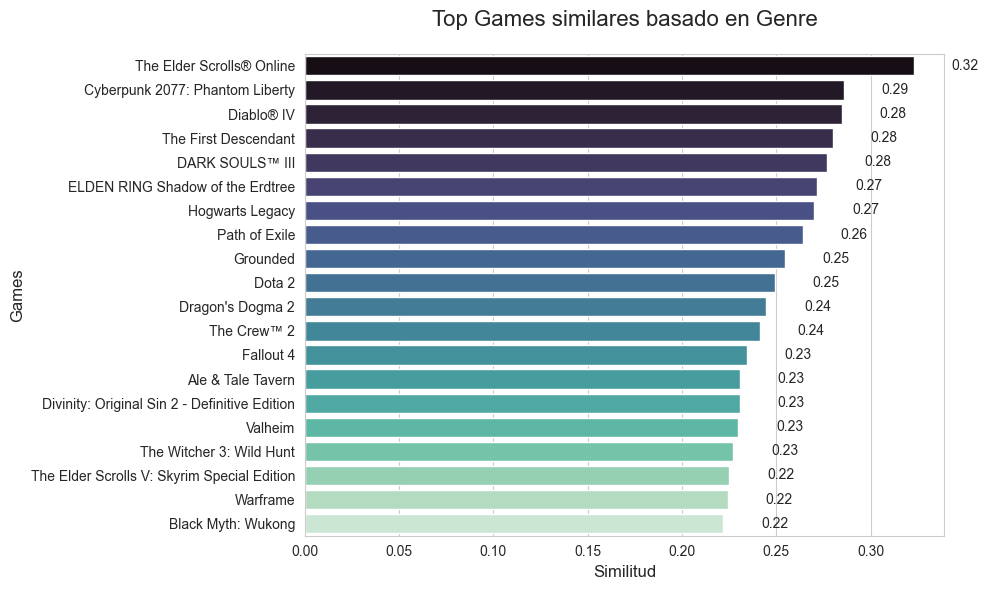

In [64]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(
    x=list(top_game.values()), 
    y=list(top_game.keys()), 
    palette="mako"
)

plt.title("Top Games similares basado en Genre", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Games", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_game.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout();

### AHORA PONGO A PRUEBA MI SISTEMA DE RECOMENDACIÓN CON 5 JUEGOS AL AZAR

In [65]:
conjunto_prueba=list(datos["name"].sample(5, random_state=42))

In [66]:
conjunto_prueba

['Sonic Frontiers',
 'Descenders',
 'Risk of Rain 2',
 'Slime Rancher',
 'theHunter: Call of the Wild™']

{'Hollow Knight': np.float64(0.35376927581575107),
 'Forza Horizon 5': np.float64(0.32294863751294417),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.2951094713158346),
 'Hogwarts Legacy': np.float64(0.294491070307201),
 'Borderlands 2': np.float64(0.27852318295812006),
 'Fallout: New Vegas': np.float64(0.26807844697524263),
 "Dragon's Dogma 2": np.float64(0.26301544996009785),
 'Gunfire Reborn': np.float64(0.2547749038131039),
 'Diablo® IV': np.float64(0.2511794681419141),
 'Visions of Mana': np.float64(0.25110440111401955)}

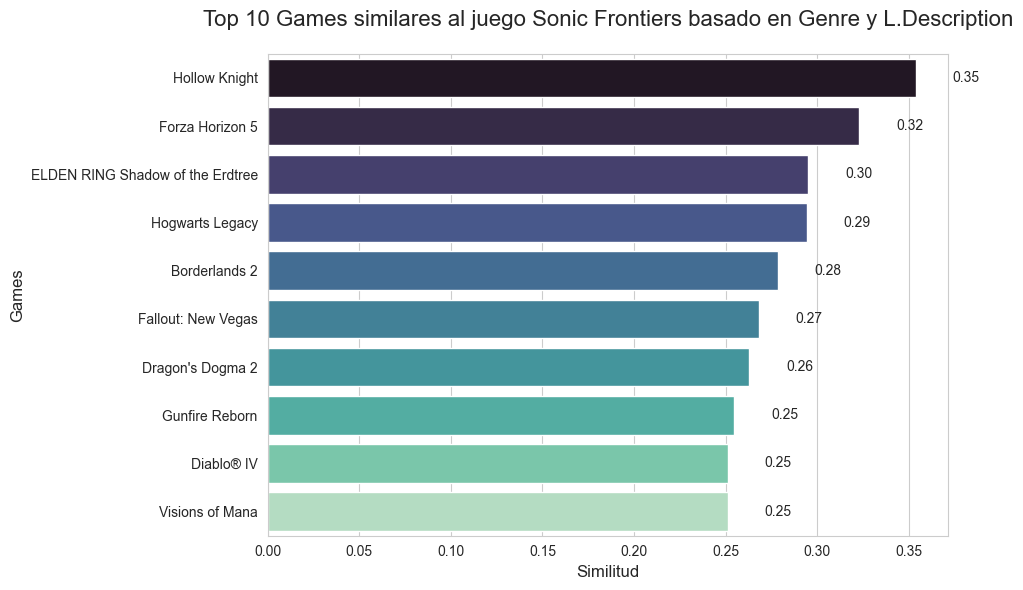

{'EA SPORTS™ Madden NFL 25': np.float64(0.3509040568767734),
 'F1® Manager 2024': np.float64(0.29096966022793597),
 'eFootball™': np.float64(0.26014699899298427),
 "Tom Clancy's Rainbow Six® Siege": np.float64(0.23421229988159897),
 'World of Tanks': np.float64(0.22103807127148764),
 'Game Dev Tycoon': np.float64(0.19843356300250437),
 'PUBG: BATTLEGROUNDS': np.float64(0.19263546233804263),
 'Team Fortress 2': np.float64(0.19106832947036512),
 'LOCKDOWN Protocol': np.float64(0.19082131148799952),
 'DiRT Rally 2.0': np.float64(0.17664114551889942)}

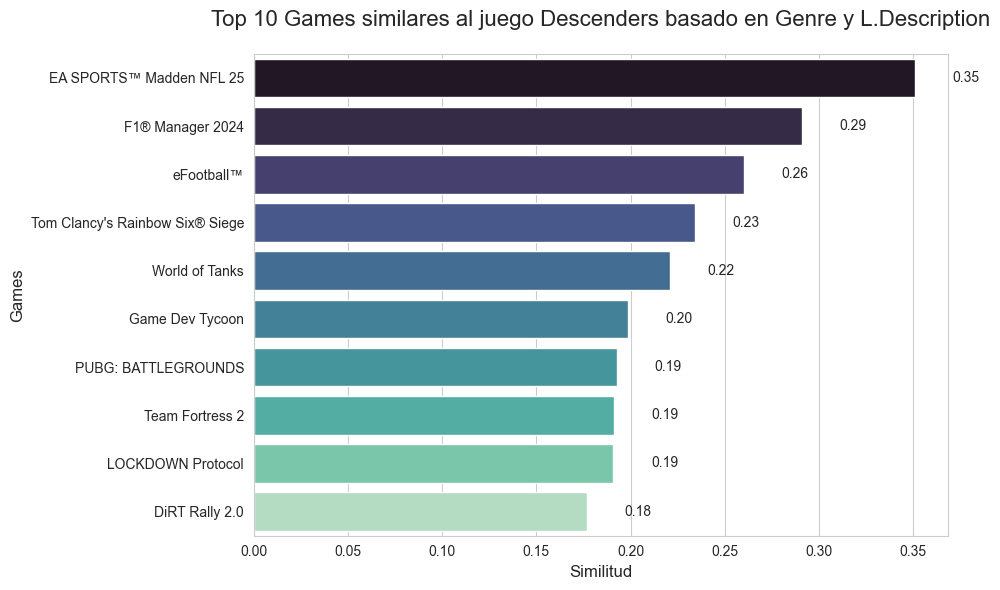

{'Gunfire Reborn': np.float64(0.3489758774573249),
 'Borderlands 2': np.float64(0.33411928336095853),
 'Left 4 Dead 2': np.float64(0.3266386465125491),
 'Vampire Survivors': np.float64(0.2813319050365181),
 'Hollow Knight': np.float64(0.27587424226704627),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.27050033401953),
 'EA SPORTS FC™ 24': np.float64(0.267792670136185),
 'Call of Duty®: Warzone™': np.float64(0.2653679994043582),
 'Motordoom': np.float64(0.26503027584015004),
 'Team Fortress 2': np.float64(0.2626594605044535)}

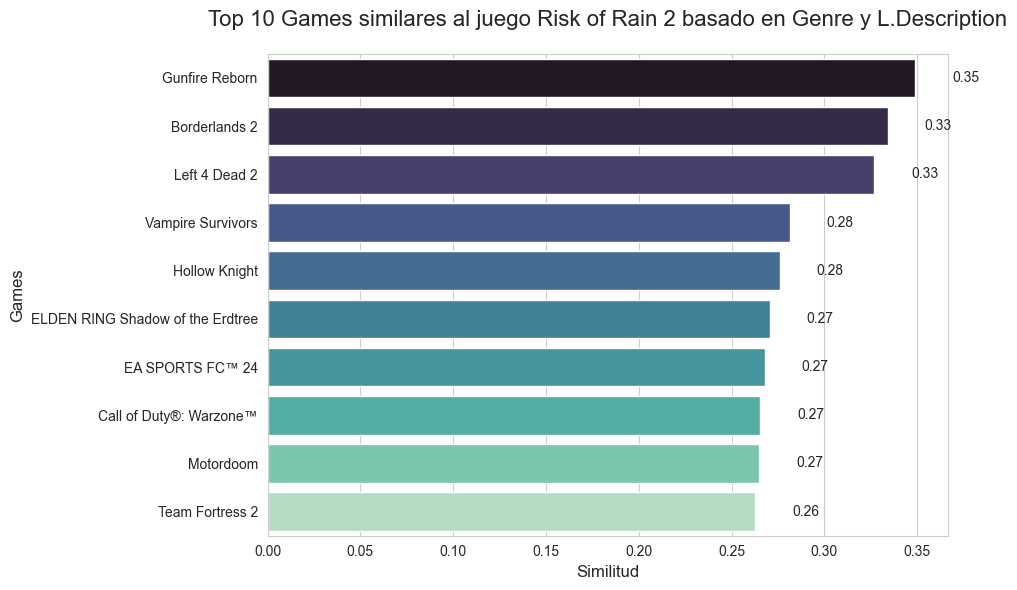

{'Core Keeper': np.float64(0.23044220760431694),
 'Ale & Tale Tavern': np.float64(0.22582676042711475),
 'Fallout 4': np.float64(0.21774600264264088),
 'Terraria': np.float64(0.21571180751361685),
 'Valheim': np.float64(0.2136994073431811),
 'Satisfactory': np.float64(0.20720722589321167),
 'The Elder Scrolls® Online': np.float64(0.2064763339300389),
 'Grounded': np.float64(0.20224770167392253),
 'The Witcher 3: Wild Hunt': np.float64(0.1993914605873603),
 'Mount & Blade II: Bannerlord': np.float64(0.1959456260246403)}

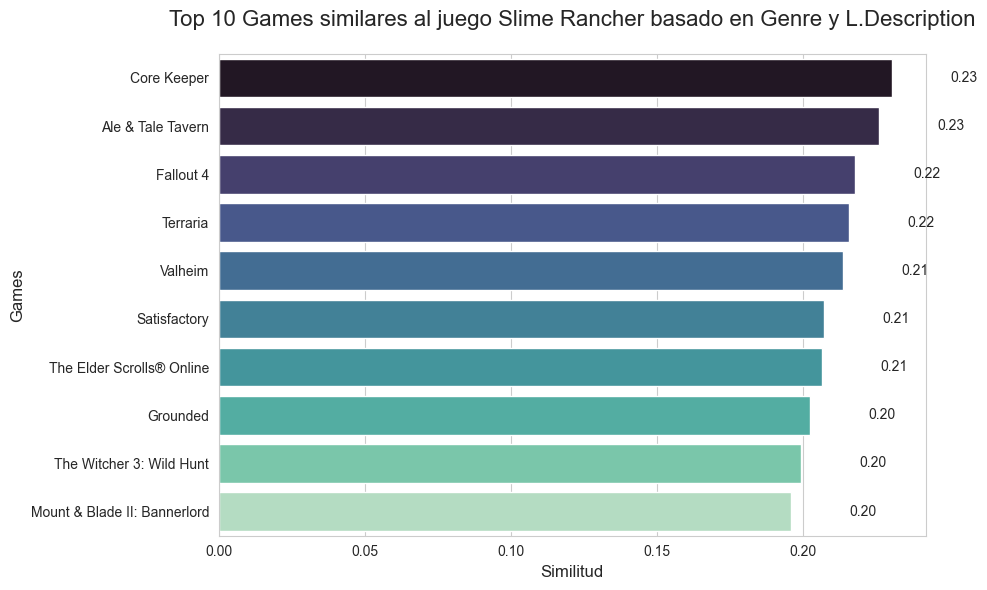

{'Fishing Planet': np.float64(0.2833000170779653),
 'The Crew™ 2': np.float64(0.2596570636873982),
 'Forza Horizon 5': np.float64(0.23052348874162368),
 'Arma 3': np.float64(0.2300637831529964),
 'Ale & Tale Tavern': np.float64(0.22838591162312186),
 '7 Days to Die': np.float64(0.22421816503027936),
 'Terraria': np.float64(0.2190076741597075),
 'RIDE 4': np.float64(0.218549470413572),
 'World of Tanks': np.float64(0.2174986490634646),
 'Russian Fishing 4': np.float64(0.21482601273991536)}

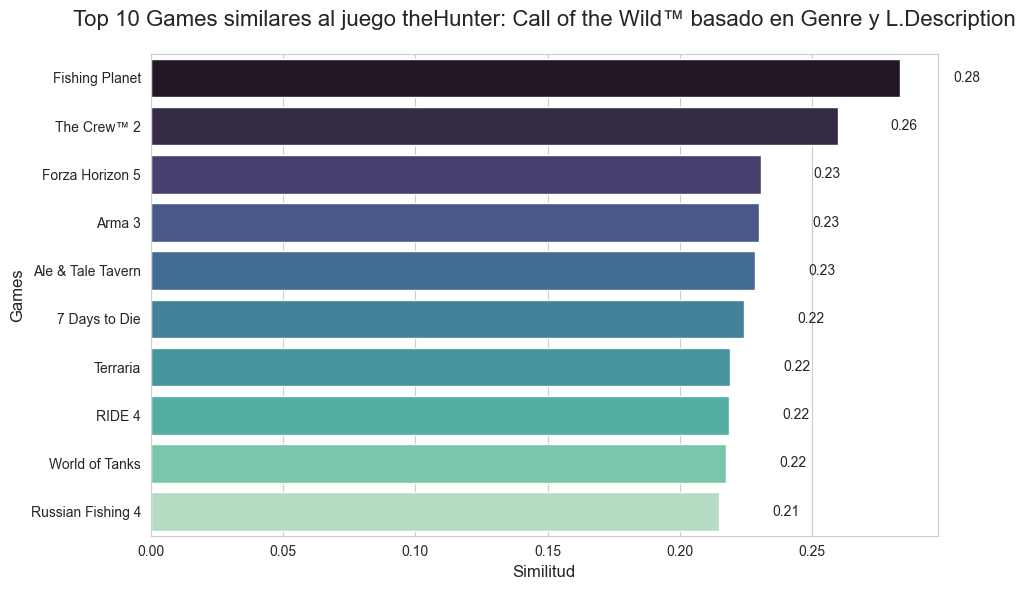

In [67]:
for juego in conjunto_prueba:  
    user_like_game=juego

    game_index= get_index_from_name(user_like_game, datos)   #esto me devuelve el indice de la peli del usuario

    #Aqui sacamos los indices y distancias del resto de las pelis resecto a nuestra peli
    similar_games=list(enumerate(similarity[game_index]))

    #Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli
    sorted_movies=sorted(similar_games, key=lambda x: x[1], reverse=True)

    top_game ={}
    for i in sorted_movies[1:11]:
        top_game[get_name_from_index(i[0], datos)]=i[1]
    display(top_game)

    #grafico
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    sns.barplot(
        x=list(top_game.values()), 
        y=list(top_game.keys()), 
        palette="mako"
    )

    plt.title(f"Top 10 Games similares al juego {juego} basado en Genre y L.Description", fontsize=16, pad=20)
    plt.xlabel("Similitud", fontsize=12)
    plt.ylabel("Games", fontsize=12)

    # Añadir valores al final de cada barra
    for i, value in enumerate(top_game.values()):
        plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

    plt.tight_layout()
    plt.show();

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## **RECOMENDACION POR PUNTUACIÓN**

In [68]:
datos.head(3)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,columnas_comparadoras
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '..."
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,Embody the superhuman skill and brutality of a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,"['Warhammer 40K', 'Action', 'Third-Person Shoo..."


In [69]:
datos["overall_player_rating"].unique()

array(['Overwhelmingly Positive', 'Very Positive', 'Mixed',
       'Mostly Positive', 'Mostly Negative', 'Very Negative',
       '7 user reviews', 'Positive', '1 user reviews', '6 user reviews',
       '4 user reviews'], dtype=object)

VOY A PASAR LAS COLUMNAS NECESARIAS A NUMÉRICAS

In [70]:
dicc= {
    "Overwhelmingly Positive": 10,
    "Very Positive": 9,
    "Positive": 8,
    "Mostly Positive": 7,
    "Mixed": 6,
    "Mostly Negative": 5,
    "Negative": 4,
    "Very Negative": 3,
    "Extremely Negative": 2,
    "Overwhelmingly Negative": 1
}

In [71]:
datos["overall_player_rating"]=datos["overall_player_rating"].map(dicc)

In [72]:
datos["overall_player_rating"].isna().sum()

np.int64(4)

como son 4 las sustituyo por la media

In [73]:
datos["overall_player_rating"].fillna(datos["overall_player_rating"].mean(), inplace=True)

In [74]:
datos["overall_player_rating"].isna().sum()

np.int64(0)

Ahora paso a numérica la de number_reviews_english

In [76]:
datos["number_of_english_reviews"]=datos["number_of_english_reviews"].str.replace(",", "")
datos["number_of_english_reviews"]=datos["number_of_english_reviews"].astype(int)
datos["overall_player_rating"]=datos["overall_player_rating"].astype(int)

In [77]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   short_description                        277 non-null    object
 2   long_description                         290 non-null    object
 3   genres                                   290 non-null    object
 4   minimum_system_requirement               290 non-null    object
 5   recommend_system_requirement             290 non-null    object
 6   release_date                             290 non-null    object
 7   developer                                290 non-null    object
 8   publisher                                290 non-null    object
 9   overall_player_rating                    290 non-null    int64 
 10  number_of_reviews_from_purchased_people  290 non-null    objec

Cargo los otros datos

In [78]:
ratings=pd.read_csv("datos/games_ranking.csv")

In [79]:
ratings.head()

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


### Por lo que veo tengo que mergear

In [80]:
df_mergeado = pd.merge(datos, ratings, 'inner', left_on="name", right_on="game_name")


In [81]:
df_mergeado.isna().sum()

name                                        0
short_description                          22
long_description                            0
genres                                      0
minimum_system_requirement                  0
recommend_system_requirement                0
release_date                                0
developer                                   0
publisher                                   0
overall_player_rating                       0
number_of_reviews_from_purchased_people     0
number_of_english_reviews                   0
link                                        0
columnas_comparadoras                       0
game_name                                   0
genre                                       0
rank_type                                   0
rank                                        0
dtype: int64

In [82]:
df_mergeado.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,columnas_comparadoras,game_name,genre,rank_type,rank
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],10,"(654,820)",51931,https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",Black Myth: Wukong,Action,Sales,4
1,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],10,"(654,820)",51931,https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",Black Myth: Wukong,Action,Revenue,2
2,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],10,"(654,820)",51931,https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",Black Myth: Wukong,Action,Review,5
3,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],10,"(654,820)",51931,https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",Black Myth: Wukong,Adventure,Sales,2
4,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],10,"(654,820)",51931,https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",Black Myth: Wukong,Adventure,Revenue,2


No necesito tantas columnas

In [83]:
df_final=df_mergeado[["name","genre", "overall_player_rating", "number_of_english_reviews" ]]

In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       656 non-null    object
 1   genre                      656 non-null    object
 2   overall_player_rating      656 non-null    int64 
 3   number_of_english_reviews  656 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.6+ KB


In [85]:
df_final.head()

,name,genre,overall_player_rating,number_of_english_reviews
0,Black Myth: Wukong,Action,10,51931
1,Black Myth: Wukong,Action,10,51931
2,Black Myth: Wukong,Action,10,51931
3,Black Myth: Wukong,Adventure,10,51931
4,Black Myth: Wukong,Adventure,10,51931


In [86]:
df_rec=df_final.groupby(["name","genre"])[["overall_player_rating","number_of_english_reviews"]].median()

In [99]:
df_rec.head()

,,overall_player_rating,number_of_english_reviews
name,genre,,
69 Balls,Sports & Racing,9.0,120.0
7 Days to Die,Simulation,9.0,158982.0
ARK: Survival Ascended,Adventure,6.0,36814.0
ARK: Survival Evolved,Action,9.0,310038.0
Age of Empires II (Retired),Strategy,10.0,43872.0


## El sistema que recomienda los juegos más populares según su calificación general y número de reseñas mostrando el Top 10 de los juegos

In [98]:
sorted_data=df_rec.sort_values(by=["overall_player_rating","number_of_english_reviews"], ascending=False)
top10_popular=sorted_data.iloc[:15]
top10_popular

overall_player_rating  \
name                     genre                                 
Terraria                 Action                         10.0   
                         Adventure                      10.0   
Garry's Mod              Simulation                     10.0   
Baldur's Gate 3          Adventure                      10.0   
                         Role-Playing                   10.0   
Stardew Valley           Role-Playing                   10.0   
                         Simulation                     10.0   
Lethal Company           Adventure                      10.0   
Left 4 Dead 2            Action                         10.0   
The Witcher 3: Wild Hunt Action                         10.0   
                         Adventure                      10.0   
                         Role-Playing                   10.0   
Bloons TD 6              Strategy                       10.0   
Wallpaper Engine         Action                         10.0   
The Forest               Action                         10.0   

                                       number_of_english_reviews  
name                     genre                                    
Terraria                 Action                         657354.0  
                         Adventure                      657354.0  
Garry's Mod              Simulation                     548369.0  
Baldur's Gate 3          Adventure                      403939.0  
                         Role-Playing                   403939.0  
Stardew Valley           Role-Playing                   377167.0  
                         Simulation                     377167.0  
Lethal Company           Adventure                      302108.0  
Left 4 Dead 2            Action                         273964.0  
The Witcher 3: Wild Hunt Action                         229117.0  
                         Adventure                      229117.0  
                         Role-Playing                   229117.0  
Bloons TD 6              Strategy                       217745.0  
Wallpaper Engine         Action                         210537.0  
The Forest               Action                         188898.0